In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:/Users/Chandrashekhar gupta/OneDrive/Documents/Credit.csv")

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

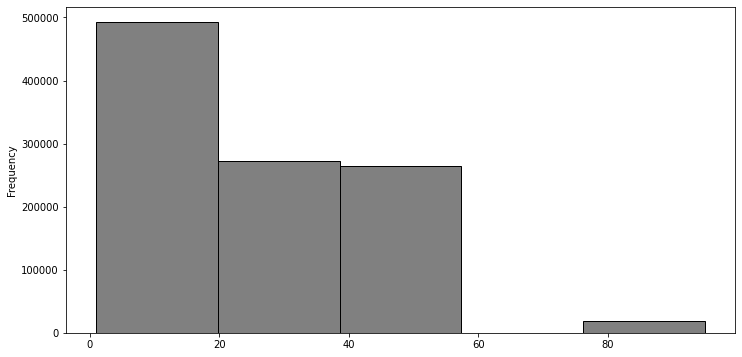

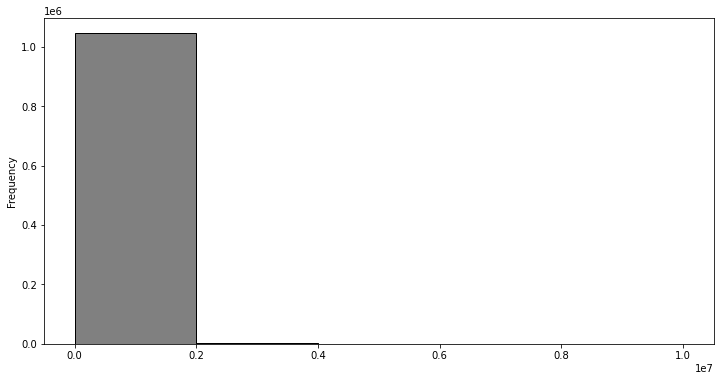

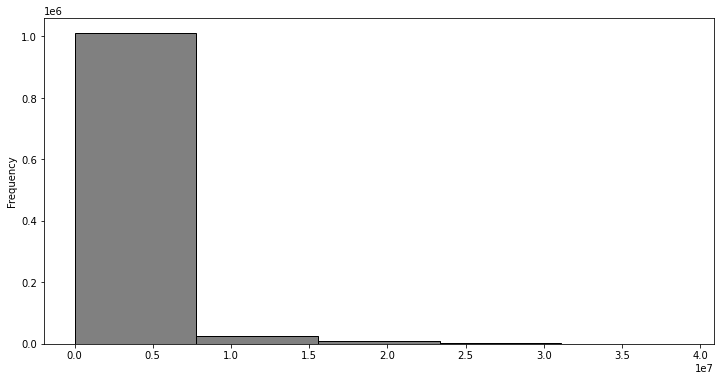

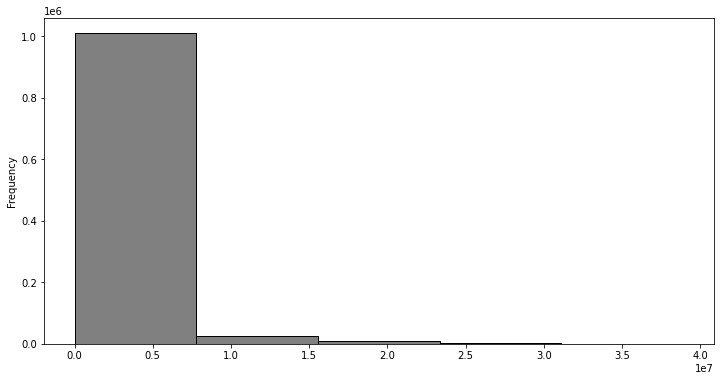

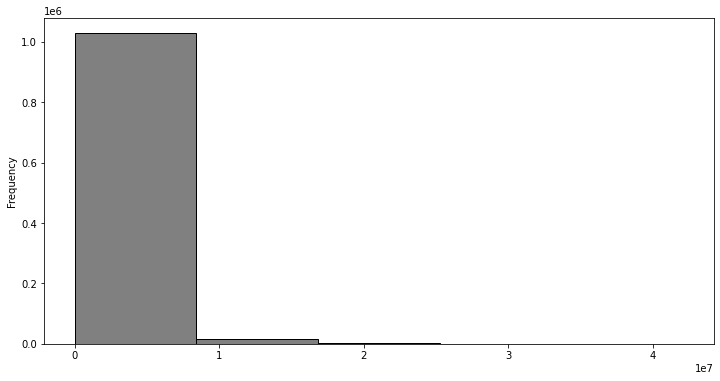

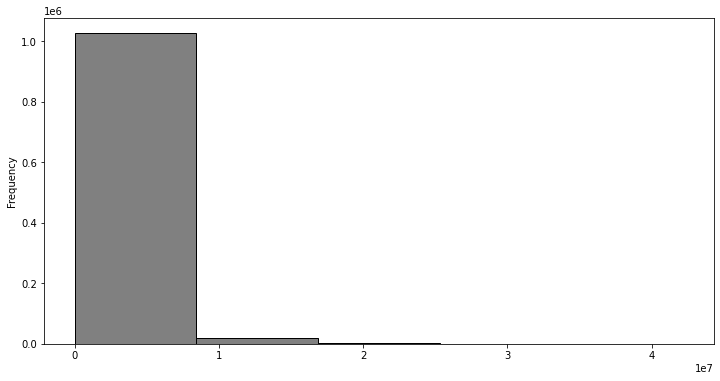

In [8]:
for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

In [9]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [10]:
for i in feature:
    print(i)
    print(data[i].quantile(0.10))
    print(data[i].quantile(0.90))

    print('\n')

amount
4220.57
373075.3779999999


oldbalanceOrg
0.0
1924613.1739999996


newbalanceOrig
0.0
2059503.9359999998


oldbalanceDest
0.0
2721593.4459999995


newbalanceDest
0.0
3102896.2




In [11]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [12]:
for i in feature:
    lower = data[i].quantile(0.10)
    upper = data[i].quantile(0.90)
    data[i] = np.where(data[i] <lower, lower,data[i])
    data[i] = np.where(data[i] >upper, upper,data[i])
    print('Feature: ',i)
    print('Skewness value: ',data[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.7964930444208819


Feature:  oldbalanceOrg
Skewness value:  2.1881516694642875


Feature:  newbalanceOrig
Skewness value:  2.1770209559093807


Feature:  oldbalanceDest
Skewness value:  1.385454781137203


Feature:  newbalanceDest
Skewness value:  1.3046789943177446




In [13]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

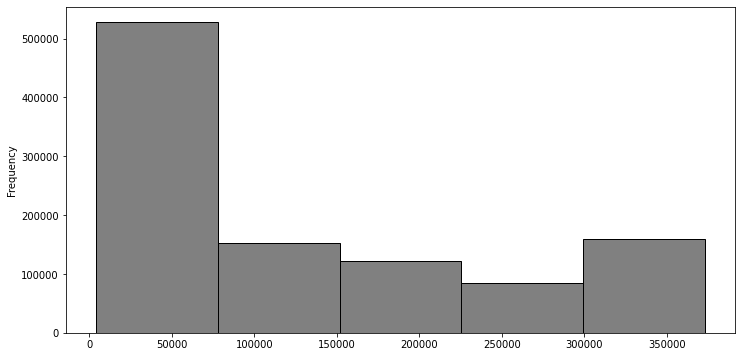

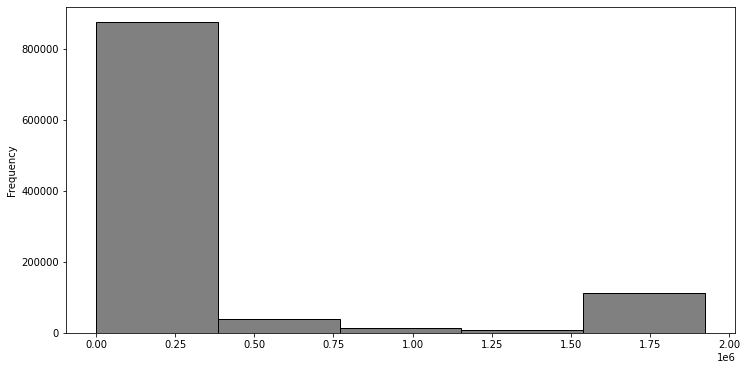

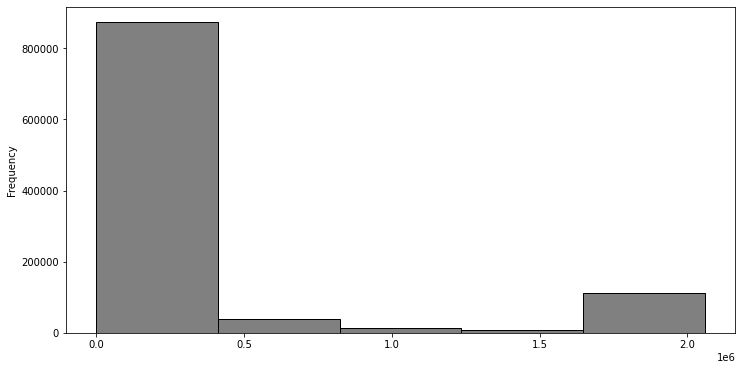

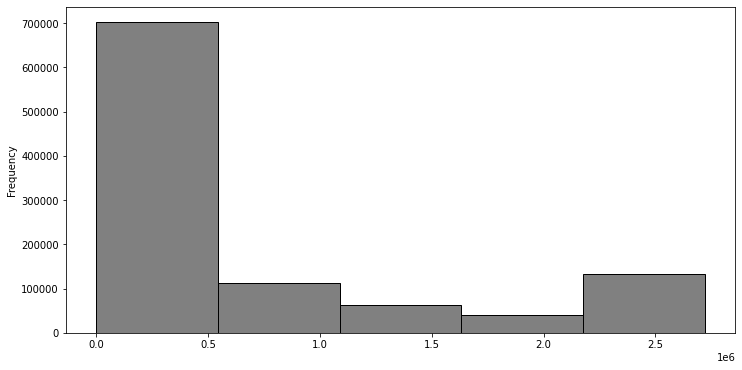

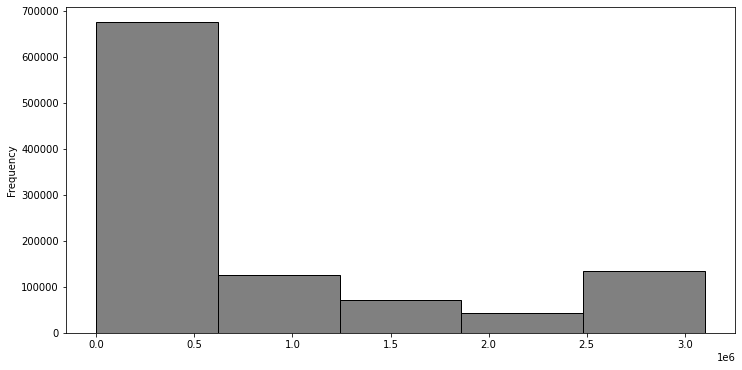

In [14]:
for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

In [15]:
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [16]:
payment = data.type.value_counts()
payment

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

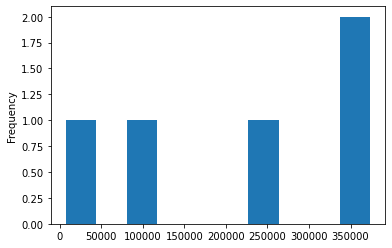

In [17]:
payment.plot(kind='hist')

<Axes: xlabel='type', ylabel='count'>

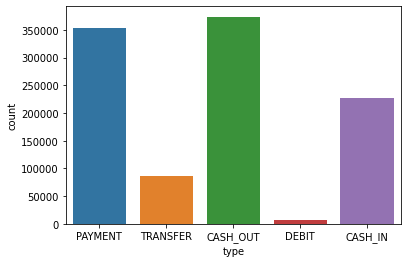

In [16]:
sns.countplot(x='type', data=data)

In [17]:
cross_tab_result=pd.crosstab(index=data.type,columns=data.isFraud)
cross_tab_result

isFraud,0,1
type,,
CASH_IN,227130,0
CASH_OUT,373063,578
DEBIT,7178,0
PAYMENT,353873,0
TRANSFER,86189,564


In [18]:
cross_tab_result[1]

type
CASH_IN       0
CASH_OUT    578
DEBIT         0
PAYMENT       0
TRANSFER    564
Name: 1, dtype: int64

<Axes: xlabel='type'>

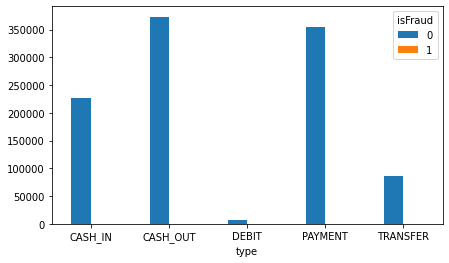

In [19]:
cross_tab_result.plot.bar(figsize=(7,4), rot=0)

<Axes: xlabel='type'>

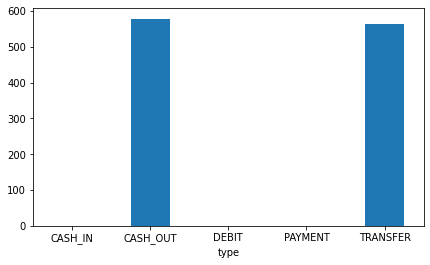

In [20]:
cross_tab_result[1].plot.bar(figsize=(7,4), rot=0)

(3500.0, 7000.0)

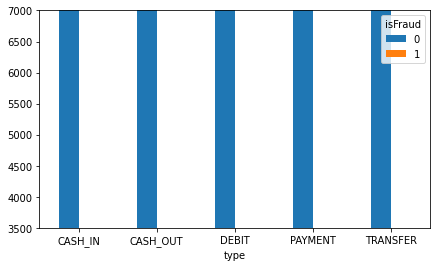

In [21]:
cross_tab_result.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

In [22]:
cross_tab_result

isFraud,0,1
type,,
CASH_IN,227130,0
CASH_OUT,373063,578
DEBIT,7178,0
PAYMENT,353873,0
TRANSFER,86189,564


In [23]:
cashout= (2233384 + 4116)
cashout_fraud= 4116/(cashout) * 100
cashout_fraud

0.18395530726256984

In [24]:
transfer= 528812+4097
transfer_fraud = 4097/(transfer) * 100
transfer_fraud

0.7687991758442811

In [25]:
data.amount

0            9839.64
1            4220.57
2            4220.57
3            4220.57
4           11668.14
             ...    
1048570    132557.35
1048571      9917.36
1048572     14140.05
1048573     10020.05
1048574     11450.03
Name: amount, Length: 1048575, dtype: float64

In [26]:
print('Minimum: ',data.amount.min())
print('Maximum: ',data.amount.max())

Minimum:  4220.57
Maximum:  373075.3779999999


<Axes: ylabel='amount'>

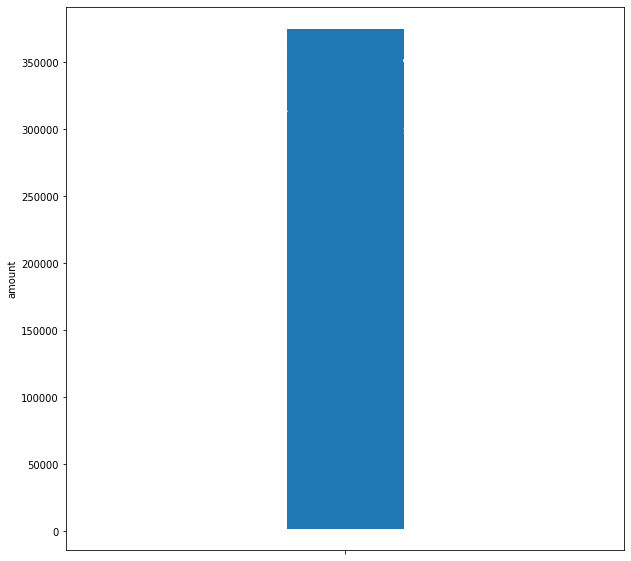

In [27]:
plt.figure(figsize=(10,10))
sns.stripplot(y=data.amount)

<Axes: title={'center': 'amount'}, xlabel='isFraud'>

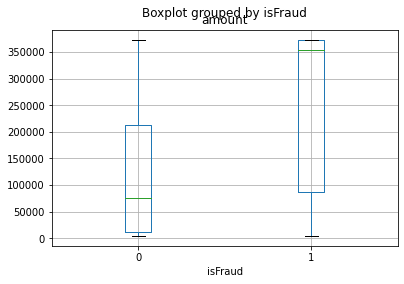

In [28]:
data.boxplot(column='amount', by='isFraud')

In [29]:
data.isFlaggedFraud.value_counts()

isFlaggedFraud
0    1048575
Name: count, dtype: int64

In [30]:
flagged_fraud_records = data[(data.isFraud==1) & (data.isFlaggedFraud==1)]
flagged_fraud_records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [31]:
flagged_fraud_records.shape

(0, 11)

In [32]:
total_fraud= data[data.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud

1142

In [33]:
total_isflaggedFraud= flagged_fraud_records.shape[0]
total_isflaggedFraud

0

In [34]:
flagged_percent = total_isflaggedFraud/total_fraud * 100
print('Percentage of flagged fraud: ',round(flagged_percent,3))

unflagged_percent= (total_fraud-total_isflaggedFraud)/total_fraud * 100
print('Percentage of incorrectly flagged fraud: ',round(unflagged_percent,3))

Percentage of flagged fraud:  0.0
Percentage of incorrectly flagged fraud:  100.0


In [35]:
total_transactions = data.shape[0]

fraud_transaction = data[data.isFraud==1].shape[0]

fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent

0.10890971079798775

In [36]:
print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))

Total transactions:  1048575
Total fraud transactions happened:  1142
Total fraud transaction percent:  0.11


In [37]:
fraud_amount= data[data.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1025194,48,CASH_OUT,373075.378,C274359236,1215297.01,0.0,C1653022223,2497294.920,3102896.20,1,0
992140,45,TRANSFER,373075.378,C1582972194,1069508.42,0.0,C284364603,0.000,0.00,1,0
955157,44,TRANSFER,373075.378,C369936121,1649818.97,0.0,C1347315975,0.000,0.00,1,0
955158,44,CASH_OUT,373075.378,C2052172437,1649818.97,0.0,C1401780750,560704.680,2210523.64,1,0
956900,44,TRANSFER,373075.378,C374179954,387952.42,0.0,C1213274351,0.000,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
277266,15,CASH_OUT,4220.570,C1584512618,119.00,0.0,C2102058838,2721593.446,3102896.20,1,0
301801,15,TRANSFER,4220.570,C553034695,170.00,0.0,C26381896,0.000,0.00,1,0
301802,15,CASH_OUT,4220.570,C1065370362,170.00,0.0,C200064275,413421.360,345764.15,1,0
1030696,85,CASH_OUT,4220.570,C823346399,4094.07,0.0,C1910586925,296534.200,300628.27,1,0


<Axes: ylabel='Frequency'>

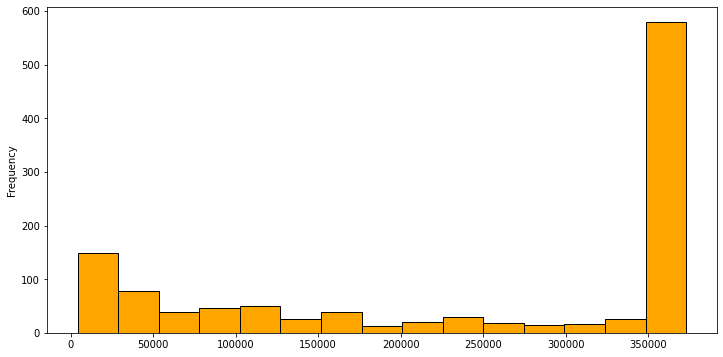

In [38]:
fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='orange',edgecolor='black')

In [39]:
fraudster= data.nameDest.value_counts()
fraudster

nameDest
C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: count, Length: 449635, dtype: int64

In [40]:
fraudster[:10]

nameDest
C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
C2083562754    86
C977993101     82
C1360767589    81
C451111351     80
C306206744     79
Name: count, dtype: int64

<Axes: ylabel='nameDest'>

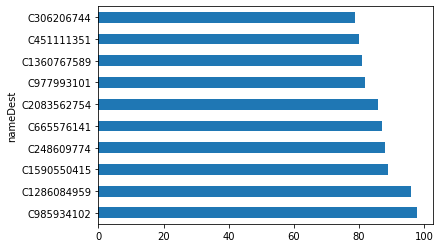

In [41]:
fraudster[:10].plot(kind='barh')

C:\Users\Chandrashekhar gupta\AppData\Local\Temp\ipykernel_10760\1113131929.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

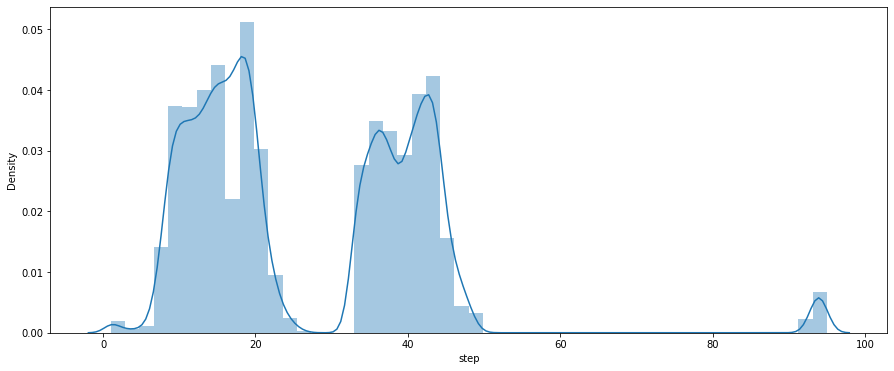

In [42]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

In [43]:
data.isFraud.value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

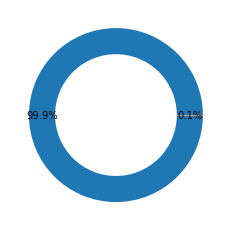

In [44]:
plt.pie(data.isFraud.value_counts(),
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [45]:
class_count_0, class_count_1 = data['isFraud'].value_counts()
class_0 = data[data['isFraud'] == 0]
class_1 = data[data['isFraud'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1047433, 11)
class 1: (1142, 11)


total class of 1 and0: isFraud
0    1142
1    1142
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='isFraud'>

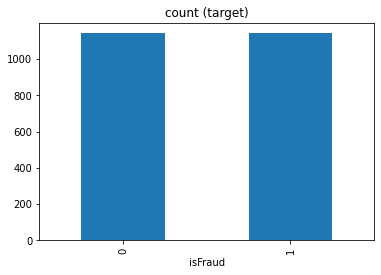

In [46]:
class_0_under = class_0.sample(class_count_1)

balanced_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",balanced_data['isFraud'].value_counts())# plot the count after under-sampeling
balanced_data['isFraud'].value_counts().plot(kind='bar', title='count (target)')

In [47]:
balanced_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
885922,42,CASH_IN,104547.89,C1042925236,1213519.26,1318067.14,C2118611862,2721593.446,3102896.20,0,0
1015838,47,PAYMENT,4220.57,C1044928037,149596.00,149559.01,M1543713637,0.000,0.00,0,0
811664,40,CASH_IN,99538.53,C1895241293,63202.00,162740.53,C1584529136,14364.400,0.00,0,0
465747,19,DEBIT,4220.57,C1988310465,31013.00,27987.28,C1793413847,27380.220,30405.94,0,0
396547,18,CASH_IN,275815.76,C1823225429,74726.00,350541.76,C985523765,93497.120,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.00,C79051264,51433.880,108179.02,1,0
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.00,C1140210295,0.000,0.00,1,0
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.00,C1759363094,0.000,33676.59,1,0
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.00,C757947873,0.000,0.00,1,0


In [48]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2284 entries, 885922 to 1048324
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            2284 non-null   int64  
 1   type            2284 non-null   object 
 2   amount          2284 non-null   float64
 3   nameOrig        2284 non-null   object 
 4   oldbalanceOrg   2284 non-null   float64
 5   newbalanceOrig  2284 non-null   float64
 6   nameDest        2284 non-null   object 
 7   oldbalanceDest  2284 non-null   float64
 8   newbalanceDest  2284 non-null   float64
 9   isFraud         2284 non-null   int64  
 10  isFlaggedFraud  2284 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 214.1+ KB


In [49]:
balanced_data.type.unique()

array(['CASH_IN', 'PAYMENT', 'DEBIT', 'CASH_OUT', 'TRANSFER'],
      dtype=object)

In [50]:
balanced_data["type"] = balanced_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [51]:
balanced_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [52]:
X = balanced_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']].values
y = balanced_data['isFraud'].values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[2.25506294e+00 1.86283638e+05 4.81392925e+05 1.59886847e+05]


In [56]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

In [57]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [58]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [59]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.8850574712643678
Testing Accuracy: 0.9059080962800875
Testing Confusion Matrix: 
[[228   6]
 [ 37 186]]
Recall Score :  0.9059080962800875
Precision Score :  0.9059080962800875
Testing F-1: 0.9059080962800875
Testing F-Beta: 0.9059080962800874
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.9688013136288999
Testing Accuracy: 0.962800875273523
Testing Confusion Matrix: 
[[221  13]
 [  4 219]]
Recall Score :  0.962800875273523
Precision Score :  0.962800875273523
Testing F-1: 0.962800875273523
Testing F-Beta: 0.9628008752735231
------------------------------
Training Model DT 
--------------
Training Accuracy: 0.9961685823754789
Testing Accuracy: 0.9846827133479212
Testing Confusion Matrix: 
[[231   3]
 [  4 219]]
Recall Score :  0.9846827133479212
Precision Score :  0.9846827133479212
Testing F-1: 0.9846827133479212
Testing F-Beta: 0.9846827133479211
------------------------------
Training Mode

In [60]:
#Display the different parameter of the model
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [61]:
# Make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [62]:
# Evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.47%


In [63]:
new_data = [[2,181,181,0]]
if  model.predict(new_data)[0] == 0:
    print('not Fraud')
else: print('is Fraud')

is Fraud
